In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck
from scipy.constants import elementary_charge
h = Planck
e = elementary_charge

In [79]:
file_path = 'current.csv'
data = pd.read_csv(file_path)
R_f = 1e5

In [80]:
data = data*1e-2
data

I
0     0.29
1     0.29
2     0.23
3     0.24
4     0.28
...    ...
3995 -0.02
3996  0.04
3997  0.10
3998  0.14
3999  0.20

[4000 rows x 1 columns]

In [81]:
n = data.size
n

4000

In [82]:
data_points = n

In [83]:
time = np.arange(0,data_points)
time = time*2.5e-5
time

array([0.000e+00, 2.500e-05, 5.000e-05, 7.500e-05, 1.000e-04, 1.250e-04,
       1.500e-04, 1.750e-04, 2.000e-04, 2.250e-04, 2.500e-04, 2.750e-04,
       3.000e-04, 3.250e-04, 3.500e-04, 3.750e-04, 4.000e-04, 4.250e-04,
       4.500e-04, 4.750e-04, 5.000e-04, 5.250e-04, 5.500e-04, 5.750e-04,
       6.000e-04, 6.250e-04, 6.500e-04, 6.750e-04, 7.000e-04, 7.250e-04,
       7.500e-04, 7.750e-04, 8.000e-04, 8.250e-04, 8.500e-04, 8.750e-04,
       9.000e-04, 9.250e-04, 9.500e-04, 9.750e-04, 1.000e-03, 1.025e-03,
       1.050e-03, 1.075e-03, 1.100e-03, 1.125e-03, 1.150e-03, 1.175e-03,
       1.200e-03, 1.225e-03, 1.250e-03, 1.275e-03, 1.300e-03, 1.325e-03,
       1.350e-03, 1.375e-03, 1.400e-03, 1.425e-03, 1.450e-03, 1.475e-03,
       1.500e-03, 1.525e-03, 1.550e-03, 1.575e-03, 1.600e-03, 1.625e-03,
       1.650e-03, 1.675e-03, 1.700e-03, 1.725e-03, 1.750e-03, 1.775e-03,
       1.800e-03, 1.825e-03, 1.850e-03, 1.875e-03, 1.900e-03, 1.925e-03,
       1.950e-03, 1.975e-03, 2.000e-03, 2.025e-03, 

In [84]:
time.size

250

In [85]:
initial = 2250
data_new = data[initial:initial+data_points]
data_new = data_new/R_f
data_new

I
2250  0.000002
2251  0.000003
2252  0.000003
2253  0.000003
2254  0.000002
...        ...
2495  0.000003
2496  0.000003
2497  0.000002
2498  0.000003
2499  0.000002

[250 rows x 1 columns]

In [86]:
current = data_new

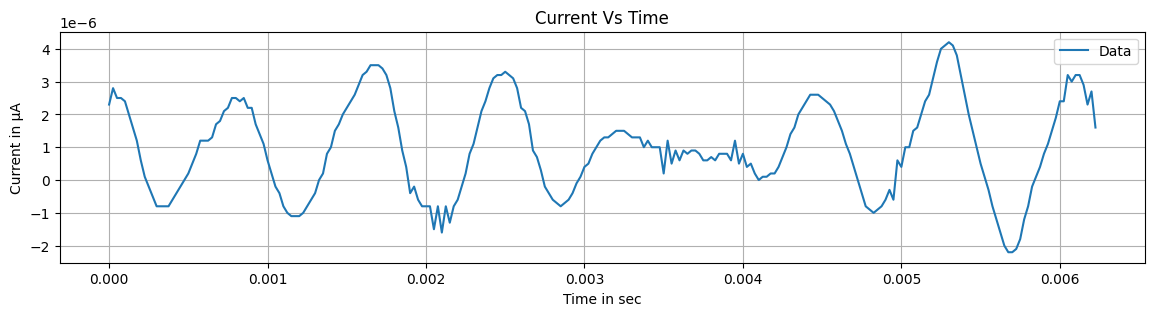

In [87]:
plt.figure(figsize=(14,3))
plt.plot(time, current, marker='', label='Data')
plt.title('Current Vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Current in \u00B5A')
plt.legend()
plt.grid(True)
plt.savefig('Current graph.png')
plt.show()


In [88]:
ste = e*e/h
ste = ste*2
ste

7.748091729863649e-05

In [89]:
v = 0.0133
conductance = current/v
steps = ste
conductance = conductance/steps

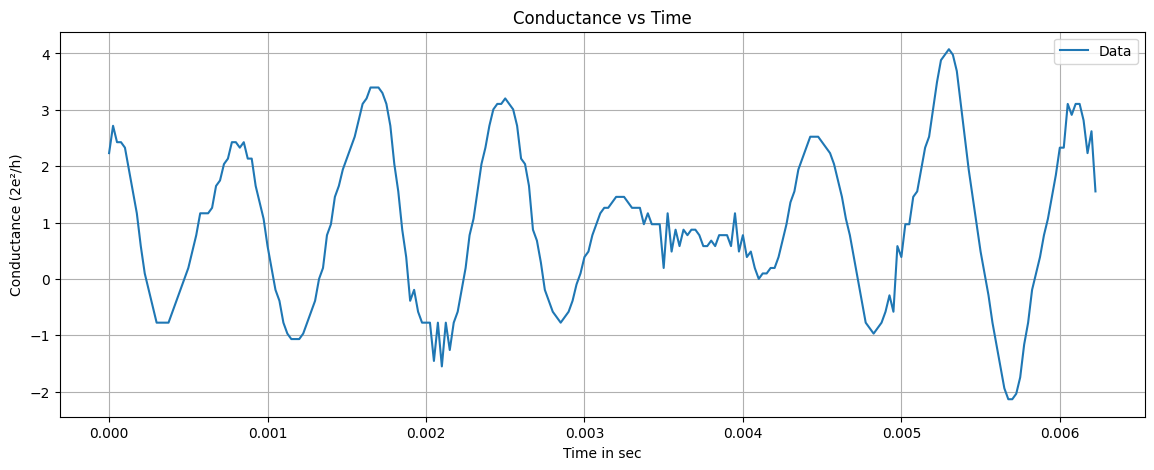

In [90]:
plt.figure(figsize=(14,5))
plt.plot(time, conductance, marker='', label='Data')
plt.title('Conductance vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Conductance (2e\u00b2/h)')
plt.legend()
plt.grid(True)
plt.savefig('conductance_graph.png')
plt.show()


In [91]:
fft_result = np.fft.fft(data_new)
frequencies = np.fft.fftfreq(len(data_new))

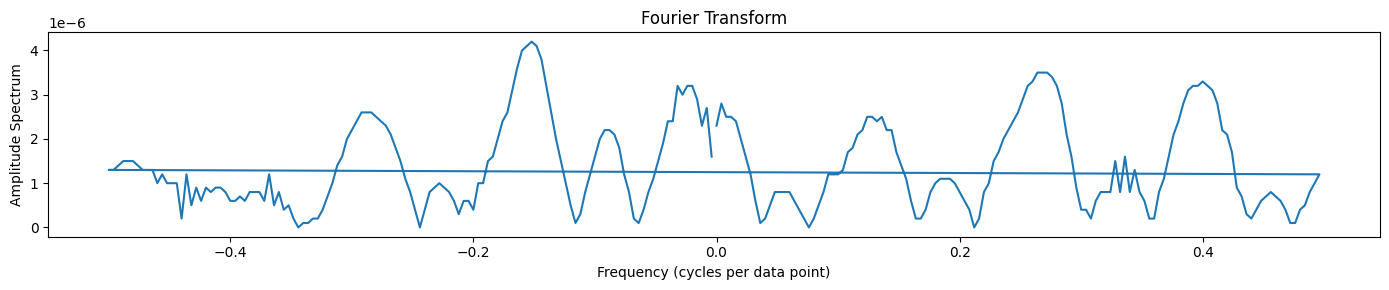

In [92]:
plt.figure(figsize=(14, 3))

plt.plot(frequencies, np.abs(fft_result), marker='')
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles per data point)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.savefig('Frequency_graph.png')
plt.show()
